In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [47]:
city_indx = 2
ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
indx_timestamp = [15, 7, 4]
indx_xlim = [0,0,9900]

Definición de parámetros

In [48]:
poblaciones = [581130, 316200, 191704]
promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
beta_array = [0.032, 0.033, 0.032]

β = beta_array[city_indx]   # 1/días
α = 1/7                     # 1/días
γ = 1/promedio_recuperacion # 1/días
ε = 1/(30*12)               # 1/días
R_0 = β/γ

Valores iniciales

In [49]:
# Valores iniciales
S0 = poblaciones[city_indx]
N  = S0 # población de Bucaramanga
E0 = 0
I0 = 1
R0 = 0
C0 = np.array([S0, E0, I0, R0])

Tiempos de simulación

In [50]:
# Simulation Time
dt = 0.01
tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][15]).days * 24 # días * 24 = horas
steps = int(tmax/dt)
t = np.linspace(0,tmax, steps)

Definicion de modelos a trabajar

SEIR Básico

In [51]:
def seir_basico(z, t):
    S, E, I, R = z
    dSdt = -((β*S*I)/N)
    dEdt =  ((β*S*I)/N) - α*E
    dIdt =  α*E   - γ*I
    dRdt =  γ*I
    return np.array([dSdt, dEdt, dIdt, dRdt])

SEIR Reinfección

In [52]:
def seir_reinfeccion(z, t):
    S, E, I, R = z
    dSdt = -((β*S*I)/N) + ε*R
    dEdt =  ((β*S*I)/N) - α*E
    dIdt =  α*E   - γ*I
    dRdt =  γ*I   - ε*R
    return np.array([dSdt, dEdt, dIdt, dRdt])

SEIR Básico

/tmp/ipykernel_8252/2647773955.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_8252/2647773955.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Bucaramanga
β = 0.034
γ  = 0.02702702702702703
R_0 = 1.258


/tmp/ipykernel_8252/2647773955.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_8252/2647773955.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Floridablanca
β = 0.0318
γ  = 0.02564102564102564
R_0 = 1.2402000000000002


/tmp/ipykernel_8252/2647773955.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Barrancabermeja
β = 0.033
γ  = 0.02857142857142857
R_0 = 1.155


/tmp/ipykernel_8252/2647773955.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);


Text(0.5, 0.935, 'Modelo SEIR Básico')

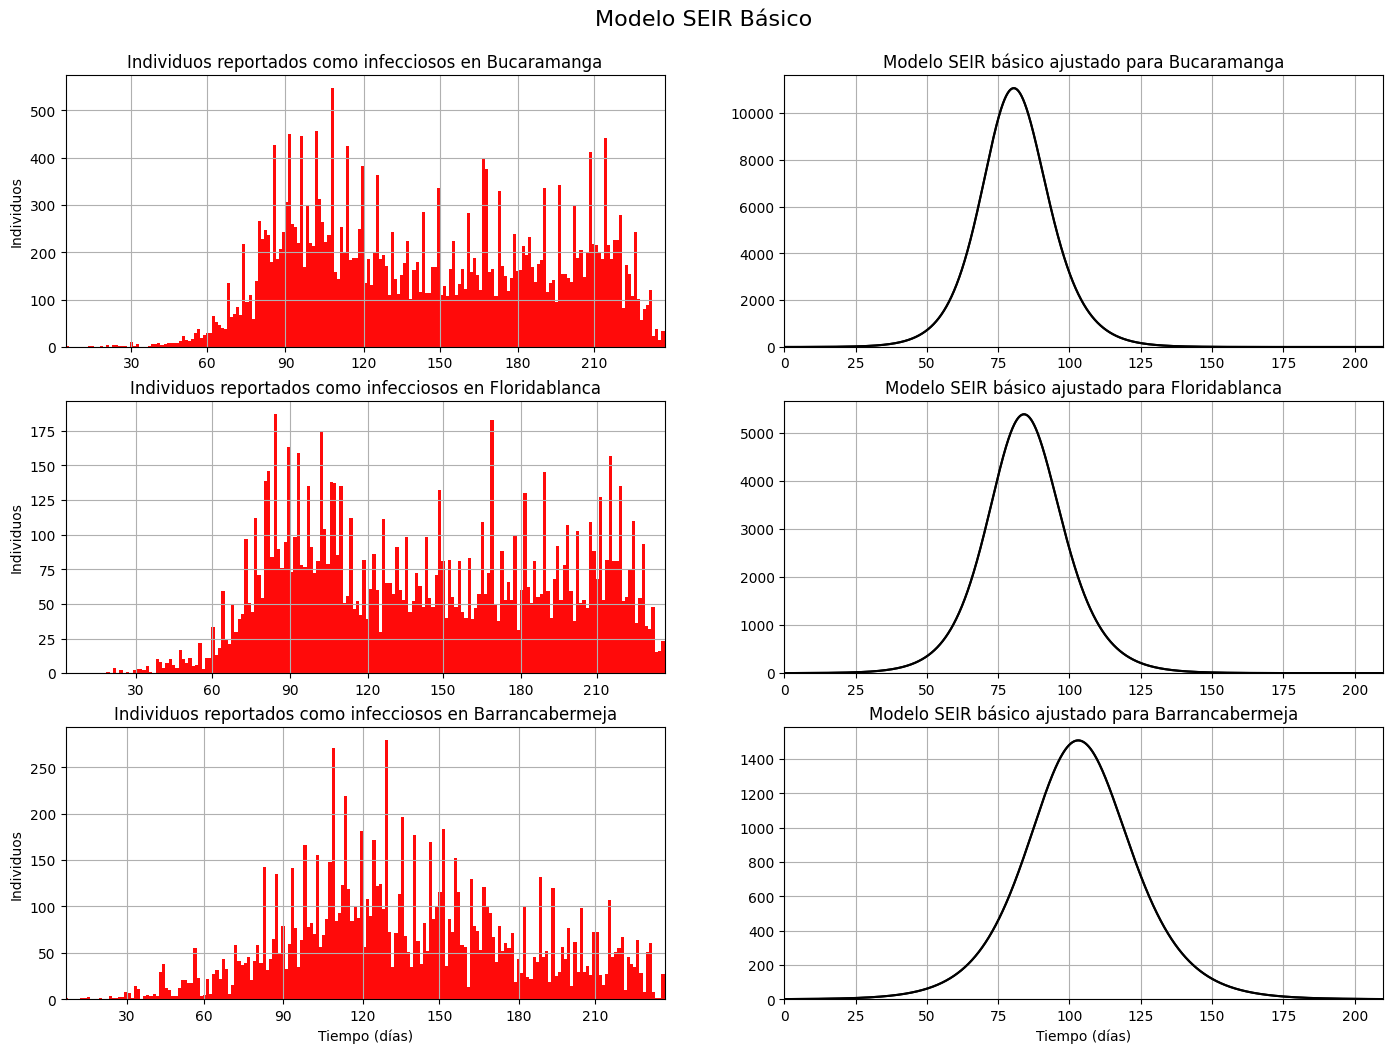

In [53]:
fig, ax = plt.subplots(3, 2 ,figsize=(17, 12))
for city in [0, 1, 2]:
    for column_ in [0, 1]:
        # Load Data
        city_indx = city
        ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
        df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
        df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
        df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
        df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
        df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
        df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
        indx_timestamp = [21, 8, 8]
        
        # Set Parameters 
        poblaciones = [581130, 316200, 191704]
        promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
        beta_array = [0.034, 0.0318, 0.033]

        β = beta_array[city_indx]   # 1/días
        α = 1/7                     # 1/días
        γ = 1/promedio_recuperacion # 1/días
        ε = 1/(30*12)               # 1/días
        R_0 = β/γ

        # Valores iniciales
        S0 = poblaciones[city_indx]
        N  = S0 # población de Bucaramanga
        E0 = 0
        I0 = 1
        R0 = 0
        C0 = np.array([S0, E0, I0, R0])

        # Simulation Time
        dt = 0.01
        tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]]).days * 24 # días * 24 = horas
        steps = int(tmax/dt)
        t = np.linspace(0,tmax, steps)
        
        # Simulación
        sol = odeint(seir_basico, C0 ,t)
        sol_S = sol[:,0]
        sol_E = sol[:,1]
        sol_I = sol[:,2]
        sol_R = sol[:,3]
        
        # Plot
        dias = len(df['Fecha de inicio de síntomas'].unique().tolist())
        ax[city, 0].hist(df['Fecha de inicio de síntomas'], bins=dias, color='red', alpha=0.8, label='Infectados reportados')
        
        # lab
        labels = [item*30 for item in range(1, len(ax[city, 0].get_xticklabels()) + 1)];
        ax[city, 0].set_xticklabels(labels);

        # lab
        ax[city, 1].plot(t/24, sol_I, label='Modelo', color='black', ls='-')

        # Grid
        ax[city, column_].grid(True)

        # Limits
        ax[city, 0].set_xlim(df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]], df['Fecha de inicio de síntomas'].max())
        ax[city, 1].set_xlim(0, 210)
        ax[city, 1].set_ylim(0)

        # Labeling
        ax[city, 0].set_title(f'Individuos reportados como infecciosos en {ciudades[city_indx]}')
        ax[city, 1].set_title(f'Modelo SEIR básico ajustado para {ciudades[city_indx]}')
        
    print('\n')
    print('-' * 100)
    print(f'Ciudad: {ciudades[city]}')
    print(f'β = {β}')
    print(f'γ  = {γ}')
    print(f'R_0 = {R_0}')

ax[0, 0].set_ylabel('Individuos')
ax[1, 0].set_ylabel('Individuos')
ax[2, 0].set_ylabel('Individuos')
ax[2, 0].set_xlabel('Tiempo (días)')
ax[2, 1].set_xlabel('Tiempo (días)')

fig.suptitle(f'Modelo SEIR Básico', fontsize=16, y=0.935)

/tmp/ipykernel_8252/2599373521.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_8252/2599373521.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Bucaramanga
β = 0.034
γ  = 0.02702702702702703
R_0 = 1.258


/tmp/ipykernel_8252/2599373521.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_8252/2599373521.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Floridablanca
β = 0.0318
γ  = 0.02564102564102564
R_0 = 1.2402000000000002


/tmp/ipykernel_8252/2599373521.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Barrancabermeja
β = 0.033
γ  = 0.02857142857142857
R_0 = 1.155


/tmp/ipykernel_8252/2599373521.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);


Text(0.5, 0.935, 'Modelo SEIR Con Reinfección')

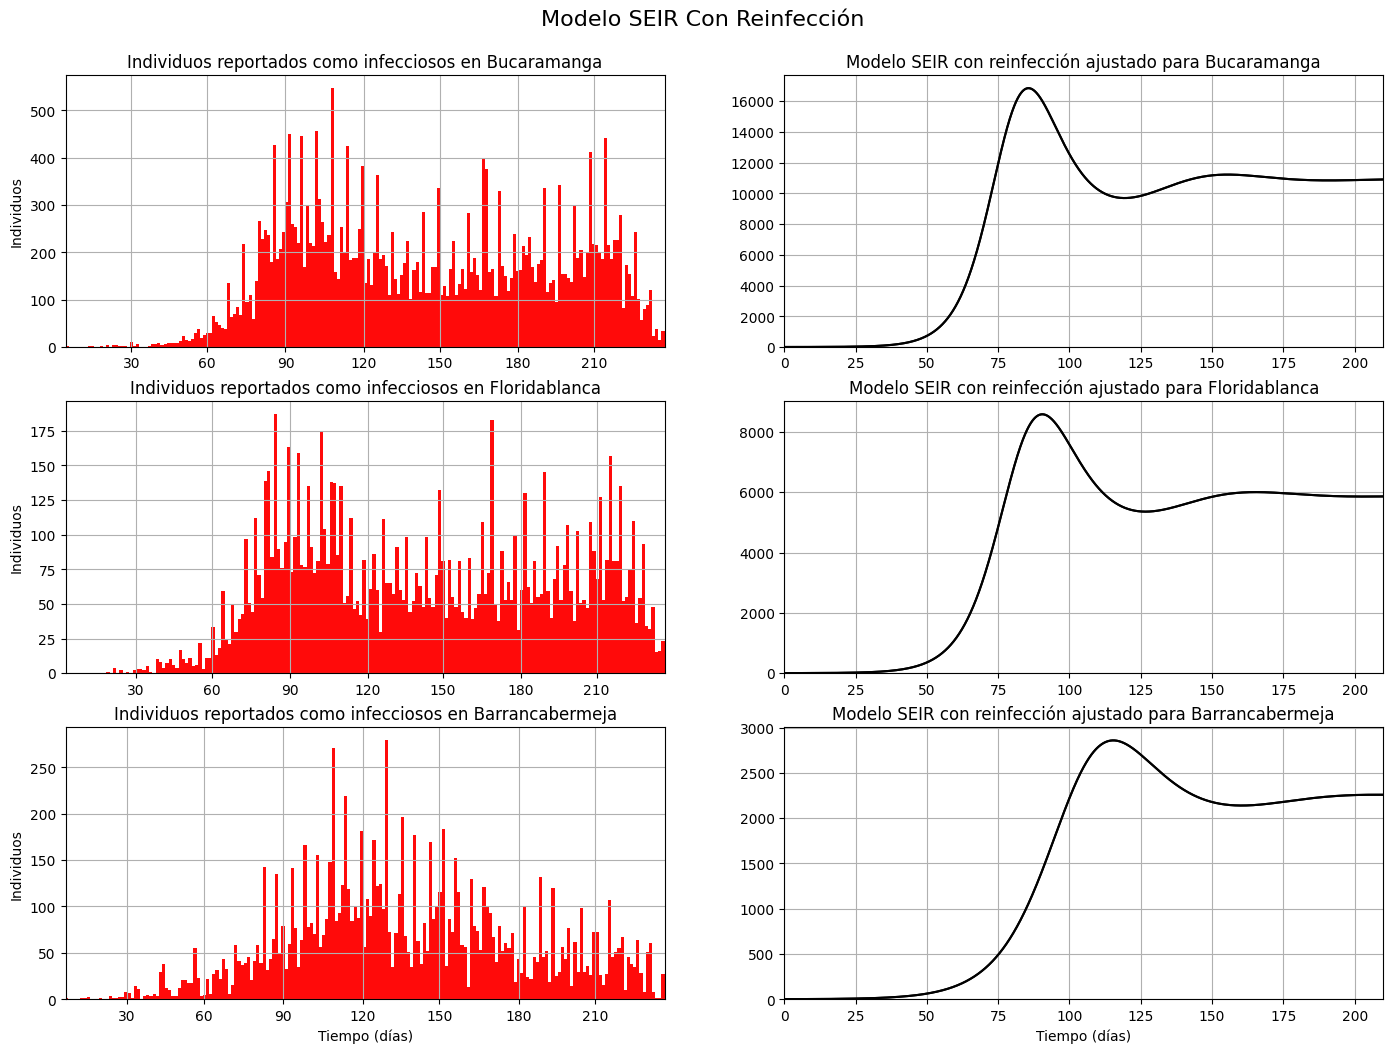

In [54]:
fig, ax = plt.subplots(3, 2 ,figsize=(17, 12))
for city in [0, 1, 2]:
    for column_ in [0, 1]:
        # Load Data
        city_indx = city
        ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
        df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
        df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
        df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
        df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
        df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
        df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
        indx_timestamp = [21, 8, 8]
        
        # Set Parameters 
        poblaciones = [581130, 316200, 191704]
        promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
        beta_array = [0.034, 0.0318, 0.033]

        β = beta_array[city_indx]   # 1/días
        α = 1/7                     # 1/días
        γ = 1/promedio_recuperacion # 1/días
        ε = 1/(30*12)               # 1/días
        R_0 = β/γ

        # Valores iniciales
        S0 = poblaciones[city_indx]
        N  = S0 # población de Bucaramanga
        E0 = 0
        I0 = 1
        R0 = 0
        C0 = np.array([S0, E0, I0, R0])

        # Simulation Time
        dt = 0.01
        tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]]).days * 24 # días * 24 = horas
        steps = int(tmax/dt)
        t = np.linspace(0,tmax, steps)
        
        # Simulación
        sol = odeint(seir_reinfeccion, C0 ,t)
        sol_S = sol[:,0]
        sol_E = sol[:,1]
        sol_I = sol[:,2]
        sol_R = sol[:,3]
        
        # Plot
        dias = len(df['Fecha de inicio de síntomas'].unique().tolist())
        ax[city, 0].hist(df['Fecha de inicio de síntomas'], bins=dias, color='red', alpha=0.8, label='Infectados reportados')
        
        # lab
        labels = [item*30 for item in range(1, len(ax[city, 0].get_xticklabels()) + 1)];
        ax[city, 0].set_xticklabels(labels);

        # lab
        ax[city, 1].plot(t/24, sol_I, label='Modelo', color='black', ls='-')

        # Grid
        ax[city, column_].grid(True)

        # Limits
        ax[city, 0].set_xlim(df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]], df['Fecha de inicio de síntomas'].max())
        ax[city, 1].set_xlim(0, 210)
        ax[city, 1].set_ylim(0)

        # Labeling
        ax[city, 0].set_title(f'Individuos reportados como infecciosos en {ciudades[city_indx]}')
        ax[city, 1].set_title(f'Modelo SEIR con reinfección ajustado para {ciudades[city_indx]}')

    print('\n')
    print('-' * 100)
    print(f'Ciudad: {ciudades[city]}')
    print(f'β = {β}')
    print(f'γ  = {γ}')
    print(f'R_0 = {R_0}')

ax[0, 0].set_ylabel('Individuos')
ax[1, 0].set_ylabel('Individuos')
ax[2, 0].set_ylabel('Individuos')
ax[2, 0].set_xlabel('Tiempo (días)')
ax[2, 1].set_xlabel('Tiempo (días)')

fig.suptitle(f'Modelo SEIR Con Reinfección', fontsize=16, y=0.935)

Dividiendo el resultado entre N

/tmp/ipykernel_8252/644793671.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_8252/644793671.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Bucaramanga
β = 0.034
γ  = 0.02702702702702703
R_0 = 1.258


/tmp/ipykernel_8252/644793671.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_8252/644793671.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Floridablanca
β = 0.0318
γ  = 0.02564102564102564
R_0 = 1.2402000000000002


/tmp/ipykernel_8252/644793671.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Barrancabermeja
β = 0.033
γ  = 0.02857142857142857
R_0 = 1.155


/tmp/ipykernel_8252/644793671.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);


Text(0.5, 0.935, 'Modelo SEIR Básico')

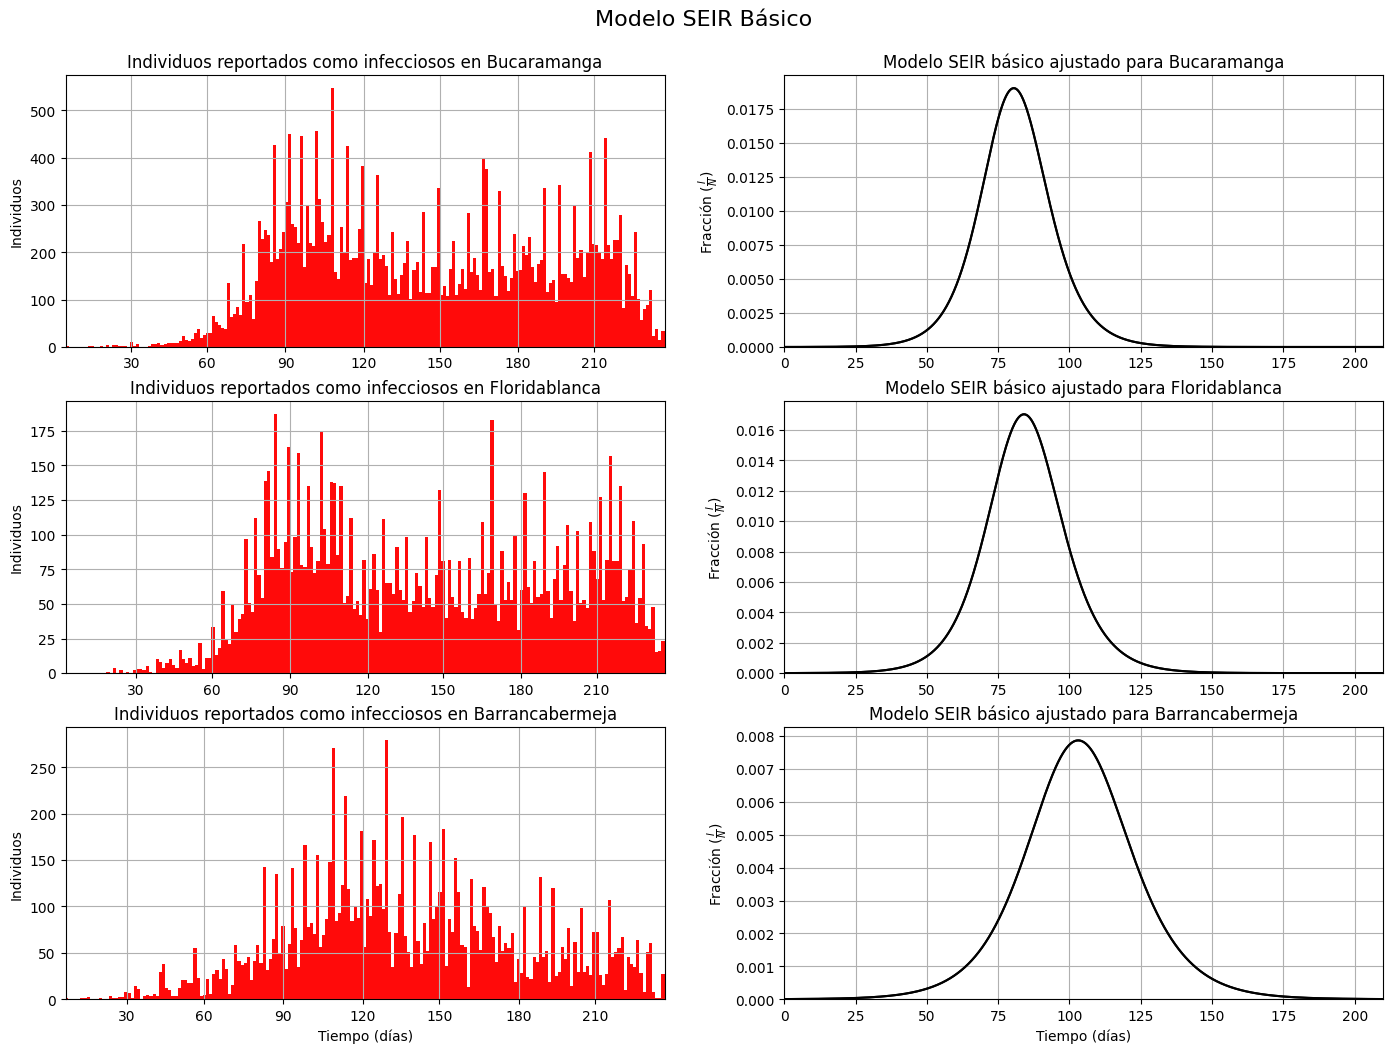

In [55]:
fig, ax = plt.subplots(3, 2 ,figsize=(17, 12))
for city in [0, 1, 2]:
    for column_ in [0, 1]:
        # Load Data
        city_indx = city
        ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
        df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
        df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
        df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
        df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
        df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
        df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
        indx_timestamp = [21, 8, 8]
        
        # Set Parameters 
        poblaciones = [581130, 316200, 191704]
        promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
        beta_array = [0.034, 0.0318, 0.033]

        β = beta_array[city_indx]   # 1/días
        α = 1/7                     # 1/días
        γ = 1/promedio_recuperacion # 1/días
        ε = 1/(30*12)               # 1/días
        R_0 = β/γ

        # Valores iniciales
        S0 = poblaciones[city_indx]
        N  = S0 # población de Bucaramanga
        E0 = 0
        I0 = 1
        R0 = 0
        C0 = np.array([S0, E0, I0, R0])

        # Simulation Time
        dt = 0.01
        tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]]).days * 24 # días * 24 = horas
        steps = int(tmax/dt)
        t = np.linspace(0,tmax, steps)
        
        # Simulación
        sol = odeint(seir_basico, C0 ,t)
        sol_S = sol[:,0]
        sol_E = sol[:,1]
        sol_I = sol[:,2]
        sol_R = sol[:,3]
        
        # Plot
        dias = len(df['Fecha de inicio de síntomas'].unique().tolist())
        ax[city, 0].hist(df['Fecha de inicio de síntomas'], bins=dias, color='red', alpha=0.8, label='Infectados reportados')
        
        # lab
        labels = [item*30 for item in range(1, len(ax[city, 0].get_xticklabels()) + 1)];
        ax[city, 0].set_xticklabels(labels);

        # lab
        ax[city, 1].plot(t/24, sol_I/N, label='Modelo', color='black', ls='-') # Dividido entre N

        # Grid
        ax[city, column_].grid(True)

        # Limits
        ax[city, 0].set_xlim(df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]], df['Fecha de inicio de síntomas'].max())
        ax[city, 1].set_xlim(0, 210)
        ax[city, 1].set_ylim(0)

        # Labeling
        ax[city, 0].set_title(f'Individuos reportados como infecciosos en {ciudades[city_indx]}')
        ax[city, 1].set_title(f'Modelo SEIR básico ajustado para {ciudades[city_indx]}')
        
    print('\n')
    print('-' * 100)
    print(f'Ciudad: {ciudades[city]}')
    print(f'β = {β}')
    print(f'γ  = {γ}')
    print(f'R_0 = {R_0}')

ax[0, 0].set_ylabel('Individuos')
ax[1, 0].set_ylabel('Individuos')
ax[2, 0].set_ylabel('Individuos')

ax[0, 1].set_ylabel(r'Fracción $(\frac{I}{N})$')
ax[1, 1].set_ylabel(r'Fracción $(\frac{I}{N})$')
ax[2, 1].set_ylabel(r'Fracción $(\frac{I}{N})$')

ax[2, 0].set_xlabel('Tiempo (días)')
ax[2, 1].set_xlabel('Tiempo (días)')

fig.suptitle(f'Modelo SEIR Básico', fontsize=16, y=0.935)

/tmp/ipykernel_8252/2693184645.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_8252/2693184645.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Bucaramanga
β = 0.034
γ  = 0.02702702702702703
R_0 = 1.258


/tmp/ipykernel_8252/2693184645.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_8252/2693184645.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Floridablanca
β = 0.0318
γ  = 0.02564102564102564
R_0 = 1.2402000000000002


/tmp/ipykernel_8252/2693184645.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Barrancabermeja
β = 0.033
γ  = 0.02857142857142857
R_0 = 1.155


/tmp/ipykernel_8252/2693184645.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);


Text(0.5, 0.935, 'Modelo SEIR Con Reinfección')

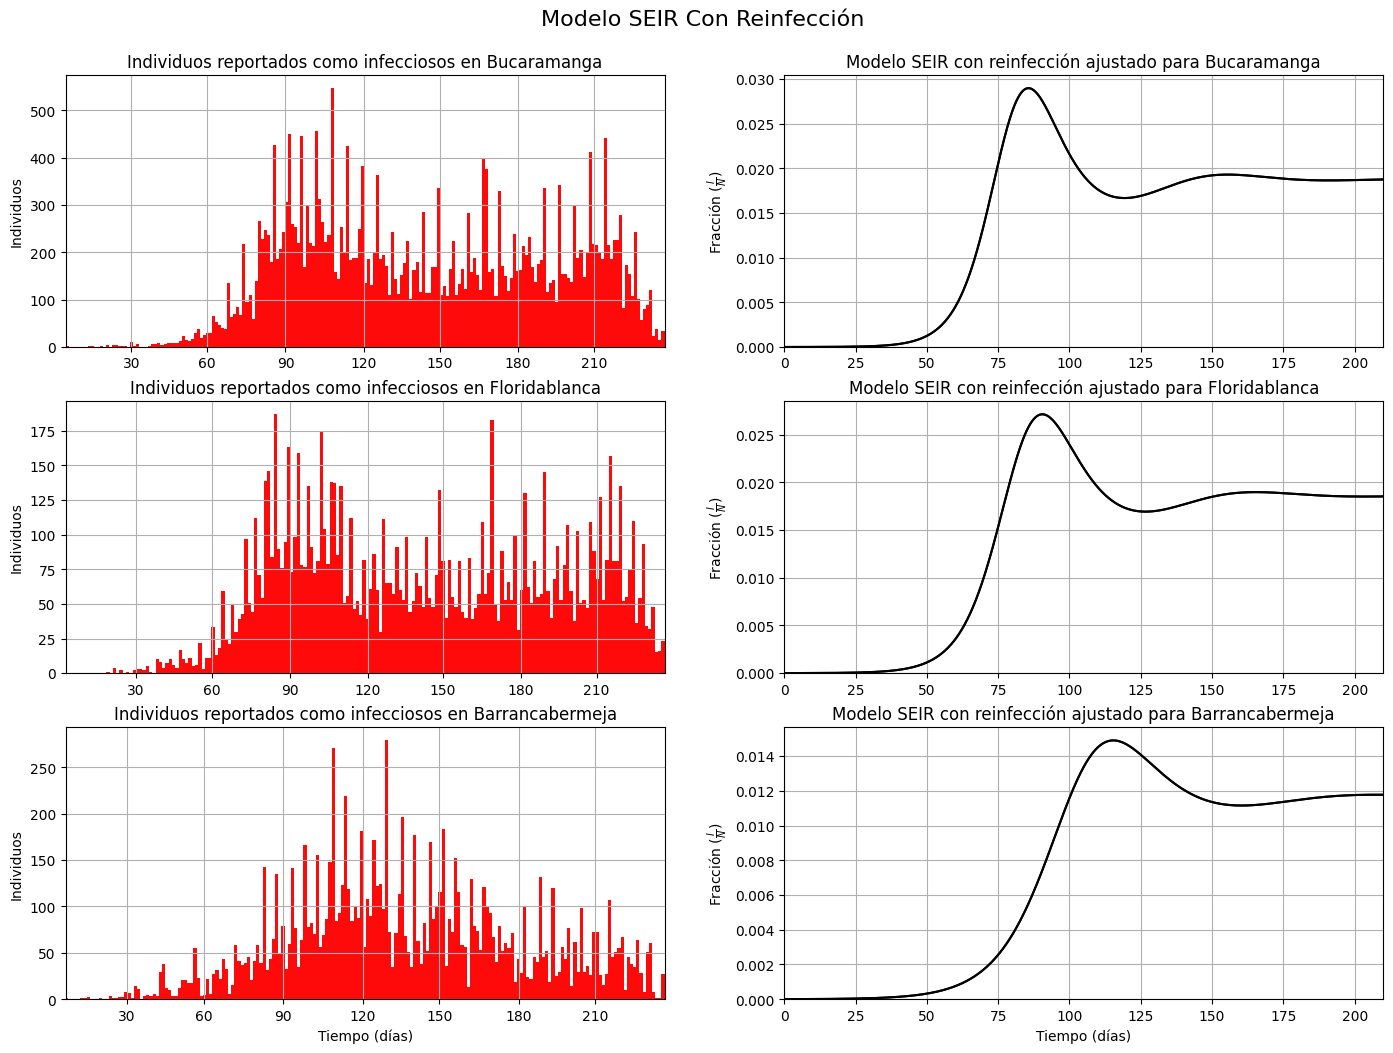

In [56]:
fig, ax = plt.subplots(3, 2 ,figsize=(17, 12))
for city in [0, 1, 2]:
    for column_ in [0, 1]:
        # Load Data
        city_indx = city
        ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
        df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
        df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
        df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
        df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
        df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
        df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
        indx_timestamp = [21, 8, 8]
        
        # Set Parameters 
        poblaciones = [581130, 316200, 191704]
        promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
        beta_array = [0.034, 0.0318, 0.033]

        β = beta_array[city_indx]   # 1/días
        α = 1/7                     # 1/días
        γ = 1/promedio_recuperacion # 1/días
        ε = 1/(30*12)               # 1/días
        R_0 = β/γ

        # Valores iniciales
        S0 = poblaciones[city_indx]
        N  = S0 # población de Bucaramanga
        E0 = 0
        I0 = 1
        R0 = 0
        C0 = np.array([S0, E0, I0, R0])

        # Simulation Time
        dt = 0.01
        tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]]).days * 24 # días * 24 = horas
        steps = int(tmax/dt)
        t = np.linspace(0,tmax, steps)
        
        # Simulación
        sol = odeint(seir_reinfeccion, C0 ,t)
        sol_S = sol[:,0]
        sol_E = sol[:,1]
        sol_I = sol[:,2]
        sol_R = sol[:,3]
        
        # Plot
        dias = len(df['Fecha de inicio de síntomas'].unique().tolist())
        ax[city, 0].hist(df['Fecha de inicio de síntomas'], bins=dias, color='red', alpha=0.8, label='Infectados reportados')
        
        # lab
        labels = [item*30 for item in range(1, len(ax[city, 0].get_xticklabels()) + 1)];
        ax[city, 0].set_xticklabels(labels);

        # lab
        ax[city, 1].plot(t/24, sol_I/N, label='Modelo', color='black', ls='-') # Dividido entre N

        # Grid
        ax[city, column_].grid(True)

        # Limits
        ax[city, 0].set_xlim(df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]], df['Fecha de inicio de síntomas'].max())
        ax[city, 1].set_xlim(0, 210)
        ax[city, 1].set_ylim(0)

        # Labeling
        ax[city, 0].set_title(f'Individuos reportados como infecciosos en {ciudades[city_indx]}')
        ax[city, 1].set_title(f'Modelo SEIR con reinfección ajustado para {ciudades[city_indx]}')

    print('\n')
    print('-' * 100)
    print(f'Ciudad: {ciudades[city]}')
    print(f'β = {β}')
    print(f'γ  = {γ}')
    print(f'R_0 = {R_0}')

ax[0, 0].set_ylabel('Individuos')
ax[1, 0].set_ylabel('Individuos')
ax[2, 0].set_ylabel('Individuos')

ax[0, 1].set_ylabel(r'Fracción $(\frac{I}{N})$')
ax[1, 1].set_ylabel(r'Fracción $(\frac{I}{N})$')
ax[2, 1].set_ylabel(r'Fracción $(\frac{I}{N})$')

ax[2, 0].set_xlabel('Tiempo (días)')
ax[2, 1].set_xlabel('Tiempo (días)')

fig.suptitle(f'Modelo SEIR Con Reinfección', fontsize=16, y=0.935)